

# Project: No-show appointments Dataset Investigation


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Dataframe URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv

#### in the below investigation we are trying to answer main two questions
1- Are no-show appointments associated with a certain gender?

2- How is age affecting patients absence? (Age groups classification)

In [22]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> * In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 


In [23]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [25]:
#some descriptive statistic
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### General Properties
>* the data set looks cleen and no nulls at all but i think we need to change the colums names to make all small letters and adjust time fields  
>* there are  mistaken age data and Handicap

In [26]:
# change the colums names to make all small letters and adjust time fields
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
# confirm the changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [27]:
#Change date and time format from string to dateTime
df[['scheduledsay','appointmentday']] = df[['scheduledday','appointmentday']].astype('datetime64[ns]')
#chance mapping  no_show, sex to be 0s and 1s for better handling .
df['no-show'] = df['no-show'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
# confirm the changes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null int64
scheduledday      110527 non-null object
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null int64
scheduledsay      110527 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(10), object(2)
memory usage: 12.6+ MB


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduledsay
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29 18:38:08
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29 16:08:27
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29 16:19:04
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29 17:29:31
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29 16:07:23


In [28]:
#remove (drop) PatientId and AppointmentID colomns since no need for them
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
# confirm the changes
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduledsay
0,0,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29 18:38:08


In [29]:
#check and remove the mistaken age data and Handicap
print (df['handcap'].unique() ) # it seems to be ok , the number explains how many disablities for the patiant
# but for easier handling we will convert the values to 0 and 1 only
df['handcap'] = df['handcap'].apply(lambda x: 1 if x >= 1 else x)

print (sorted(df['age'].unique()) ) # only one age mistake (-1)

#drop the rows wich contains age value = -1
df.drop(index=df[df.age ==-1].index, inplace=True)
# confirm -1 removal 
print ((df['age'].unique().any()=='-1') )

[0 1 2 3 4]
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
False


In [30]:
# create new columns for AGE Groups
def getagegroup (currentAge):   

    if currentAge < 14 :
        return 'child (0–14)'
    if currentAge < 31 :
        return 'young (15–35)' 
    if currentAge < 51 :
        return 'mid-aged (36–55)' 
    else:
        return 'older (>50)' 
#create a column to show age group
df['age_group'] = df.age.apply(getagegroup)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduledsay,age_group
0,0,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29 18:38:08,older (>50)
1,1,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29 16:08:27,older (>50)
2,0,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29 16:19:04,older (>50)
3,0,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29 17:29:31,child (0–14)
4,0,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29 16:07:23,older (>50)


<a id='eda'></a>
## Exploratory Data Analysis


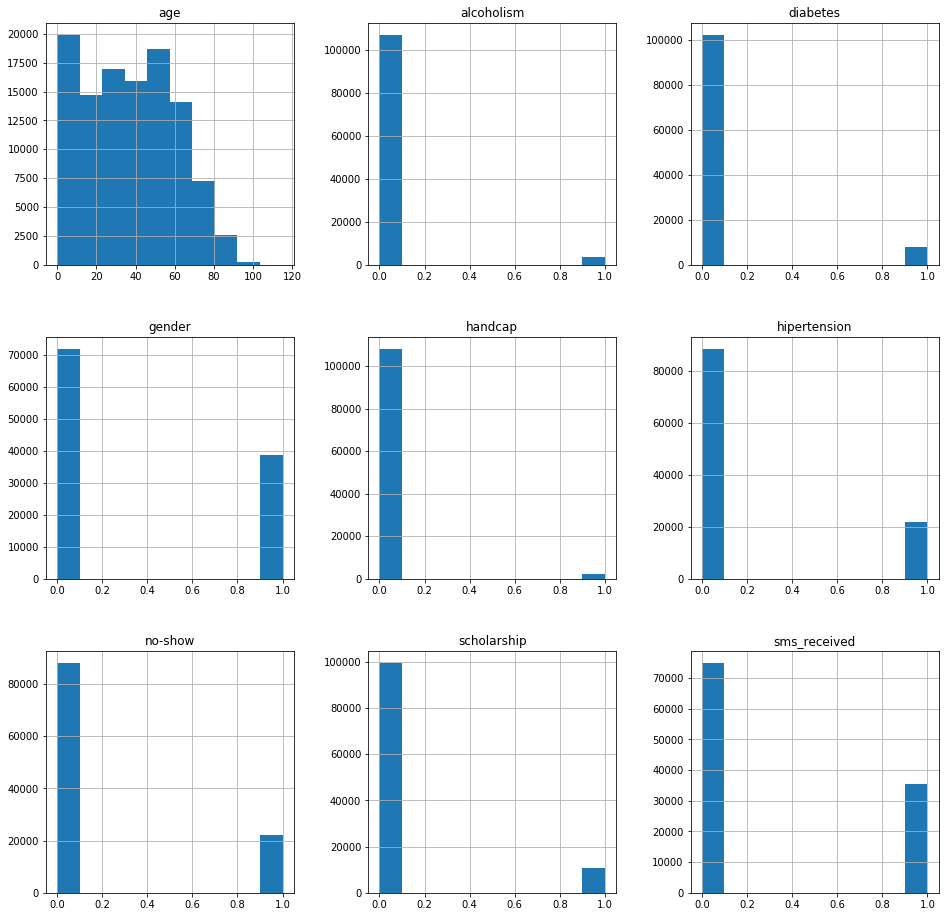

In [31]:
df.hist(figsize=(16, 16));

### A quick look at the graphs above shows that the data are ok , so we can proceed to answer the research questions

### Research Question 1 : Check if there is corelation between Age and No Show

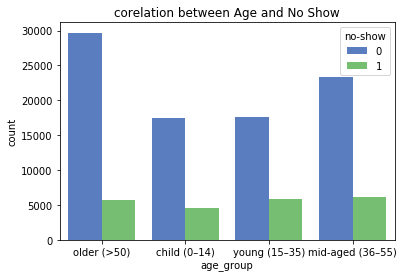

In [32]:
# plot the relation between age group and no show
sns.countplot(x='age_group', hue='no-show', data=df, palette='muted').set_title("corelation between Age and No Show")
plt.show();

## it is clear from the above graph that there is negative corelation for increasing age and not showing to appointments

### Research Question 2  Check if there is corelation between Gender and No Show

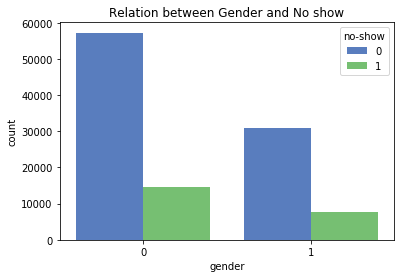

In [33]:
#totals= df.groupby('gender').count()
#proportions = count/totals
#proportions.plot(kind= 'bar',title='Relation between Gender and No show')
sns.countplot(x='gender', hue='no-show', data=df, palette='muted').set_title("Relation between Gender and No show")
plt.show();

### The Graph apove shows that females are  committed to thier appointments

<a id='conclusions'></a>
## Conclusions

>The vast majority of the population are patients who showed up to their appointments They have also higher mean age of compare to not showing up patients.
The patients who went to their appointments were stacked up to higher age groups
> the data set analysis showed that as people gets old they became more committed to thier medical appointments also females are more committed compared to men

### Limitations : there were some limitation with our data as below
>* most of the data were categorical which did not allow for high level statistical method that can be used to investigete corellations
>* we don't have clear details for certain factors to draw up conclosion for example tha data shows that the no_shower are most likily to recieve SMS which is not logical , the data did not show when did they recive the SMS  



In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0